<a href="https://colab.research.google.com/github/ellenbeatryzbarone/DeltaV_AerospaceUPE/blob/main/CubeSat_Simula%C3%A7%C3%A3oControle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

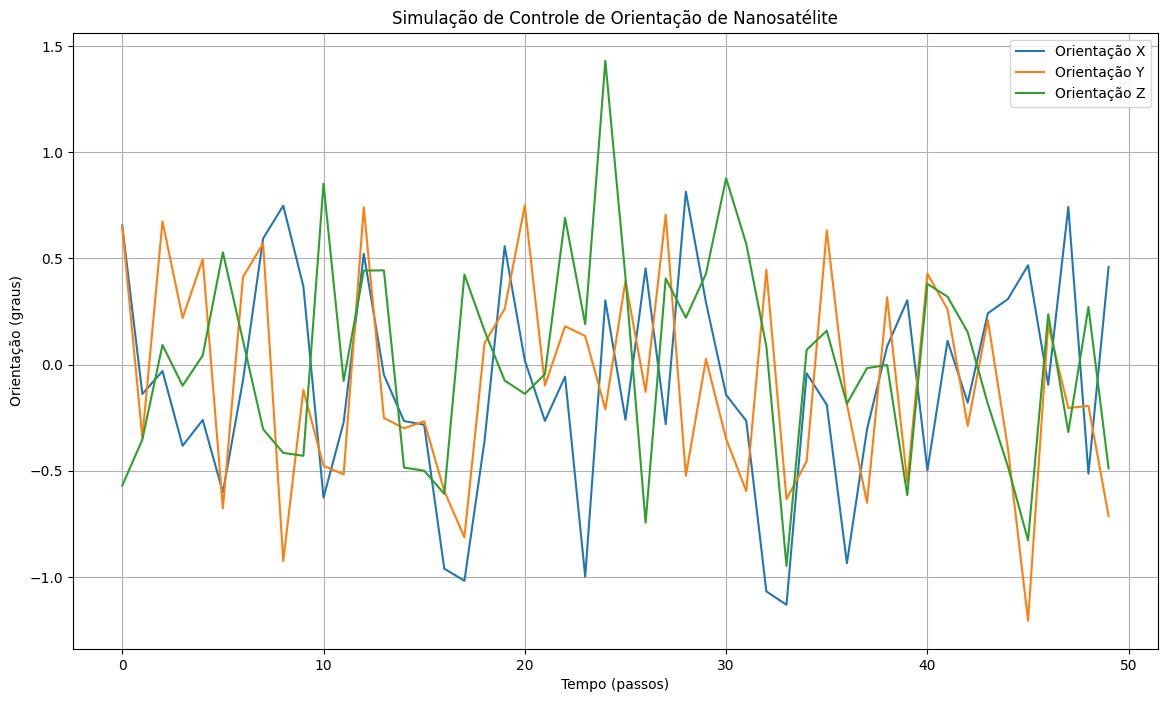

In [1]:
# Instalar bibliotecas necessárias
!pip install numpy matplotlib

import numpy as np
import matplotlib.pyplot as plt

# Parâmetros iniciais do satélite
num_sensores = 3  # sensores de orientação (exemplo: acelerômetros ou giroscópios)
num_atuadores = 3  # atuadores de controle (exemplo: torques nas rodas de reação)

# Matriz de transferência (simplificada)
# Higher values mean stronger influence
transfer_matrix = np.array([
    [1.0, 0.2, 0.1],
    [0.2, 1.0, 0.3],
    [0.1, 0.3, 1.0]
])

# Estado inicial do satélite (ângulo de orientação, em graus)
orientation = np.array([10.0, -5.0, 15.0])  # posições iniciais

# Dados de sensores (simulação)
def read_sensors(true_orientation):
    # Adiciona ruído para simular sensores reais
    noise = np.random.normal(0, 0.5, size=true_orientation.shape)
    return true_orientation + noise

# Controle: ajustar a orientação baseado nos sensores
def control_loop(desired_orientation, current_orientation):
    error = desired_orientation - current_orientation
    # Calcula comandos de atuador usando matriz de controle
    # Aqui, usamos inversa da matriz de transferência para simplificar
    inv_transfer = np.linalg.inv(transfer_matrix)
    command = np.dot(inv_transfer, error)
    return command

# Simulação da trajetória
desired_orientation = np.array([0.0, 0.0, 0.0])  # objetivo: orientação zero
history_orientation = []
history_sensors = []
history_commands = []

# Simulando por 50 passos
for step in range(50):
    sensor_data = read_sensors(orientation)
    command = control_loop(desired_orientation, sensor_data)
    # Aplica os comandos (simplificado: soma ao estado)
    orientation = orientation + np.dot(transfer_matrix, command)
    # Armazena os dados
    history_orientation.append(orientation.copy())
    history_sensors.append(sensor_data)
    history_commands.append(command)

# Converção para array numpy para facilitar
history_orientation = np.array(history_orientation)

# Plotando os resultados
plt.figure(figsize=(14, 8))
plt.plot(history_orientation[:,0], label='Orientação X')
plt.plot(history_orientation[:,1], label='Orientação Y')
plt.plot(history_orientation[:,2], label='Orientação Z')
plt.xlabel('Tempo (passos)')
plt.ylabel('Orientação (graus)')
plt.title('Simulação de Controle de Orientação de Nanosatélite')
plt.legend()
plt.grid()
plt.show()